In [1]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Paso 2: Cargar el archivo CSV
df = pd.read_csv('data.csv')

In [3]:
# Paso 3: Inspeccionar los datos
print(df.head())
print(df.info())

                                        Course Title  Rating           Level  \
0                                  Fashion as Design     4.8  Beginner level   
1                             Modern American Poetry     4.4  Beginner level   
2                          Pixel Art for Video Games     4.5  Beginner level   
3    Distribución digital de la música independiente     NaN  Beginner level   
4  The Blues: Understanding and Performing an Ame...     4.8  Beginner level   

                       Duration           Schedule         Review  \
0      20 hours (approximately)  Flexible schedule  2,813 reviews   
1  Approx. 34 hours to complete  Flexible schedule    100 reviews   
2       9 hours (approximately)  Flexible schedule    227 reviews   
3   Approx. 8 hours to complete  Flexible schedule            NaN   
4  Approx. 11 hours to complete  Flexible schedule    582 reviews   

                                 What you will learn  \
0                                               

In [4]:
# Paso 4: Limpieza de datos
# Eliminar filas duplicadas
df.drop_duplicates(inplace=True)

In [5]:
# Paso 2: Extracción y validación de datos
# Verificar si hay datos faltantes
print("Datos faltantes por columna:")
print(df.isnull().sum())

Datos faltantes por columna:
Course Title              0
Rating                 1349
Level                  1106
Duration                241
Schedule                641
Review                 1352
What you will learn    4110
Skill gain                0
Modules                   0
Instructor                0
Offered By                0
Keyword                   0
Course Url                0
dtype: int64


In [6]:
# Rellenar datos faltantes o eliminar filas según sea necesario
df.dropna(subset=['Rating','Level', 'Duration','Schedule', 'Review', 'What you will learn'], inplace=True)  # Eliminar filas con datos críticos faltantes

In [7]:
# Validar tipos de datos y transformar si es necesario
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Duration'] = df['Duration'].apply(lambda x: int(x.split()[0]) if x.split()[0].isdigit() else np.nan)

In [8]:
# Paso 5: Análisis de datos
# Calcular el promedio de calificaciones por curso
average_rating = df.groupby('Course Title')['Rating'].mean().reset_index()
print(average_rating)

                                           Course Title  Rating
0      Assisting Public Sector Decision Makers With ...     4.8
1      Comercio, Inmigración y Tipos de Cambio en un...     4.9
2      FPGA computing systems: Background knowledge ...     4.6
3                      Future Healthcare Payment Models     4.5
4      IBM and ISC2 Cybersecurity Specialist Profess...     4.8
...                                                 ...     ...
2108                          لغة الجسد | Body Language     4.5
2109  ما هي الإدارة ولماذا نحتاج إليها |What and Why...     4.9
2110    مهارات إدارة المواهب | Talent Management Skills     4.9
2111     مهارات تنشيط الذاكرة | Memory Enhancing Skills     4.9
2112                                         파이썬 단기집중과정     4.7

[2113 rows x 2 columns]


In [9]:
# Curso con mayor y menor calificación
highest_rated_course = df.loc[df['Rating'].idxmax()]
lowest_rated_course = df.loc[df['Rating'].idxmin()]
print("HIGH")
print(highest_rated_course)
print("LOW")
print(lowest_rated_course)

HIGH
Course Title                    El Holocausto: el abismo de la humanidad
Rating                                                               5.0
Level                                                     Beginner level
Duration                                                             NaN
Schedule                                               Flexible schedule
Review                                                        28 reviews
What you will learn    Ahondaremos en la vida de los judíos entreguer...
Skill gain                                                            []
Modules                ['La vida judía antes del Holocausto y el asce...
Instructor                                     ['Sandra Rosenfeld Katz']
Offered By                                               ['Yad Vashem ']
Keyword                                              Arts and Humanities
Course Url                  https://www.coursera.org/learn/el-holocausto
Name: 362, dtype: object
LOW
Course Title     

In [10]:
# Calcular porcentaje de cursos con horario flexible
flexible_courses = df[df['Schedule'].str.contains('flexible', case=False, na=False)]
flexible_percentage = round((len(flexible_courses) / len(df)) * 100, 2)
print("NUM")
print(flexible_courses)
print("PERCENTAGE")
print(flexible_percentage)

NUM
                                           Course Title  Rating  \
4     The Blues: Understanding and Performing an Ame...     4.8   
5                          So You Think You Know Tango?     4.6   
13    Basic Elements of Design: Design Principles an...     4.7   
21    Antisemitismo: Desde sus orígenes hasta el pre...     4.9   
28     Health, Society, and Wellness in COVID-19 Times      4.6   
...                                                 ...     ...   
8633  How Technology is Shaping Democracy and the 20...     4.4   
8634  El trabajo por proyectos en escuelas de contex...     4.8   
8644                                  The North Awakens     4.3   
8653  Desarrollo de Videojuegos 3D en Unity: Una Int...     4.2   
8654    Enseñar, aprender y evaluar en Escuelas Rurales     4.8   

               Level  Duration           Schedule       Review  \
4     Beginner level       NaN  Flexible schedule  582 reviews   
5     Beginner level       NaN  Flexible schedule  107 revi

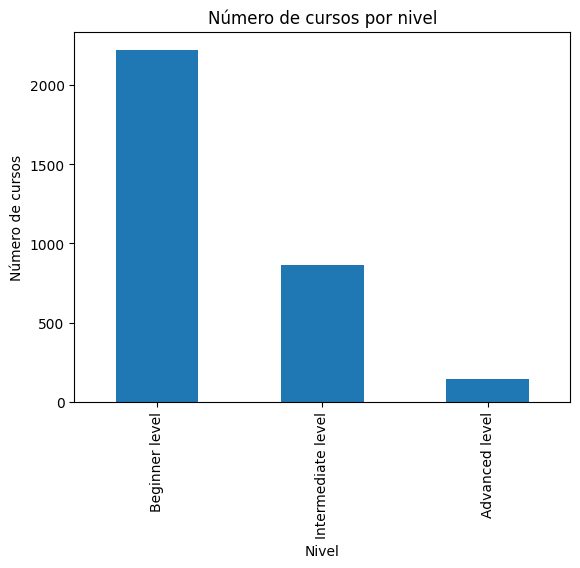

In [11]:
# Paso 6: Visualizaciones
# Gráfica de barras del número de cursos por nivel de dificultad
df['Level'].value_counts().plot(kind='bar')
plt.title('Número de cursos por nivel')
plt.xlabel('Nivel')
plt.ylabel('Número de cursos')
plt.show()

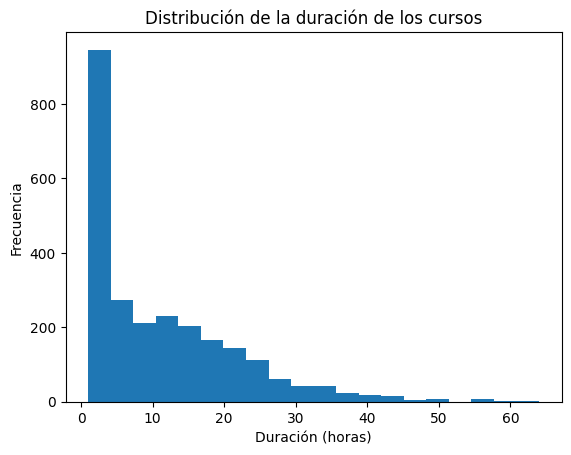

In [12]:
# Histograma de la distribución de duraciones de los cursos
df['Duration'].dropna().plot(kind='hist', bins=20)
plt.title('Distribución de la duración de los cursos')
plt.xlabel('Duración (horas)')
plt.ylabel('Frecuencia')
plt.show()

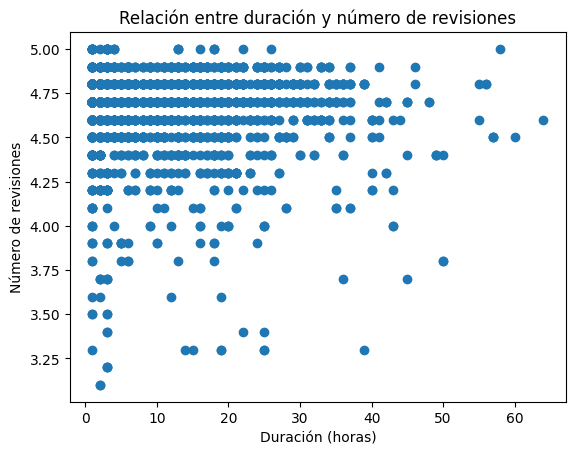

In [15]:
plt.scatter(df['Duration'], df['Rating'])
plt.title('Relación entre duración y número de revisiones')
plt.xlabel('Duración (horas)')
plt.ylabel('Número de revisiones')
plt.show()

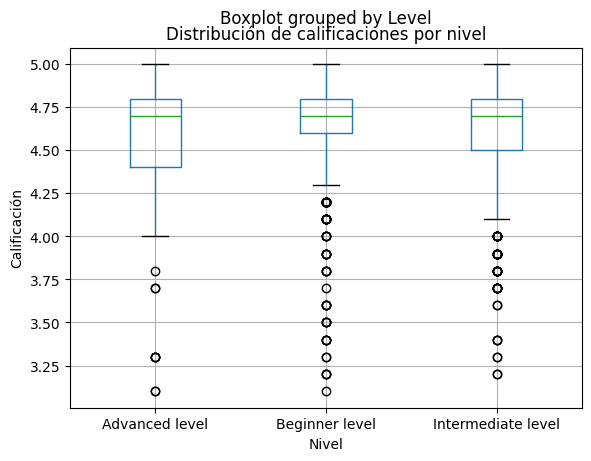

In [17]:
df.boxplot(column='Rating', by='Level')
plt.title('Distribución de calificaciones por nivel')
plt.xlabel('Nivel')
plt.ylabel('Calificación')
plt.show()
